<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/sci100_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**1. Prediction[33pts]**

In the cell bellow you have presure data $p(t)$. Our goal is to develop a model to predict the presure in the future.

To do that we use the following model
$$ p_{t+1} = \sum_{j=t-8}^t \alpha_j p_j  + \beta $$

To find the coeficients, $\alpha$ we set up a system
$$
\begin{pmatrix}
p_{11} \\ p_{12} \\ . \\ . \\ p_{t+1}
\end{pmatrix} =
\begin{pmatrix}
p_1 & p_2 & ... & p_9 &   1 \\
p_2 & p_3 & ... & p_{10}  & 1 \\
p_3 & p_4 & ... & p_{11} &  & 1 \\
 &  & ... &  &  1 \\
p_{t-8} & p_{t-7} & ... &  p_{t} & 1\\
\end{pmatrix}
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ . \\ \alpha_{9} \\ \beta
\end{pmatrix}
$$

Given the data bellow

1[10pt]. Write a code to setup the system

2[10pt]. Solve for the coeficients $\alpha$

3[5pt]. Use the coeficients to predict the data for 100 times into the future.

4[3pt]. Plot the solution

5[5pt]. Is the model we use is good to represent the data? Explain in up to 30 words.


In [168]:
p = [ 1.0000,  1.0126,  1.0488,  1.1072,  1.1869,  1.2876,  1.4096,  1.5537,
         1.7211,  1.9136,  2.1331,  2.3821,  2.6636,  2.9807,  3.3370,  3.7367,
         4.1840,  4.6835,  5.2400,  5.8581,  6.5425,  7.2970,  8.1246,  9.0262,
        10.0007, 11.0429, 12.1430, 13.2850, 14.4454, 15.5923, 16.6848, 17.6747,
        18.5082, 19.1307, 19.4925, 19.5552, 19.2979, 18.7204, 17.8440, 16.7085,
        15.3668, 13.8782, 12.3022, 10.6930,  9.0966,  7.5495,  6.0780,  4.6999,
         3.4253,  2.2584,  1.1991,  0.2437, -0.6133, -1.3790, -2.0610, -2.6675,
        -3.2064, -3.6853, -4.1115, -4.4919, -4.8327, -5.1394, -5.4174, -5.6710,
        -5.9044, -6.1212, -6.3244, -6.5167, -6.7005, -6.8776, -7.0496, -7.2178,
        -7.3831, -7.5463, -7.7078, -7.8677, -8.0261, -8.1827, -8.3371, -8.4888,
        -8.6369, -8.7807, -8.9191, -9.0510, -9.1752, -9.2906, -9.3960, -9.4901,
        -9.5718, -9.6401, -9.6941, -9.7329, -9.7561, -9.7631, -9.7540, -9.7287,
        -9.6875, -9.6311, -9.5602, -9.4758, -9.3792, -9.2716, -9.1547, -9.0299,
        -8.8990, -8.7636, -8.6255, -8.4862, -8.3475, -8.2109, -8.0778, -7.9495,
        -7.8272, -7.7121, -7.6052, -7.5071, -7.4188, -7.3407, -7.2734, -7.2172,
        -7.1724, -7.1394, -7.1180, -7.1085, -7.1107, -7.1247, -7.1501, -7.1869,
        -7.2347, -7.2933, -7.3621, -7.4409, -7.5291, -7.6260, -7.7311, -7.8437,
        -7.9628, -8.0877, -8.2173, -8.3505, -8.4863, -8.6234, -8.7603, -8.8958,
        -9.0282, -9.1562, -9.2781, -9.3925, -9.4976, -9.5921, -9.6745, -9.7435,
        -9.7980, -9.8371, -9.8598, -9.8659, -9.8548, -9.8268, -9.7820, -9.7210,
        -9.6446, -9.5539, -9.4501, -9.3347, -9.2093, -9.0755, -8.9353, -8.7903,
        -8.6425, -8.4935, -8.3452, -8.1992, -8.0569, -7.9199, -7.7894, -7.6666,
        -7.5524, -7.4477, -7.3534, -7.2699, -7.1978, -7.1375, -7.0894, -7.0534,
        -7.0299, -7.0188, -7.0201, -7.0337, -7.0594, -7.0970, -7.1463, -7.2068,
        -7.2783, -7.3603, -7.4523, -7.5536, -7.6636, -7.7817, -7.9069, -8.0384,
        -8.1751, -8.3160, -8.4599, -8.6054, -8.7512, -8.8957, -9.0374, -9.1748,
        -9.3060, -9.4295, -9.5435, -9.6464, -9.7367, -9.8129, -9.8738, -9.9182,
        -9.9452, -9.9544, -9.9452, -9.9177, -9.8722, -9.8091, -9.7293, -9.6340,
        -9.5245, -9.4024, -9.2693, -9.1272, -8.9779, -8.8235, -8.6658, -8.5069,
        -8.3486, -8.1926, -8.0407, -7.8942, -7.7547, -7.6232, -7.5010, -7.3888,
        -7.2875, -7.1977, -7.1199, -7.0546, -7.0020, -6.9624, -6.9358, -6.9222,
        -6.9217, -6.9341, -6.9592]

Coefficients: [ 4.74290938e-01 -2.37113322e+00  3.92166221e+00 -6.51576981e-01
 -4.87769165e+00  3.06274882e+00  5.27854201e+00 -8.70263437e+00
  4.86578263e+00 -6.95259605e-05]


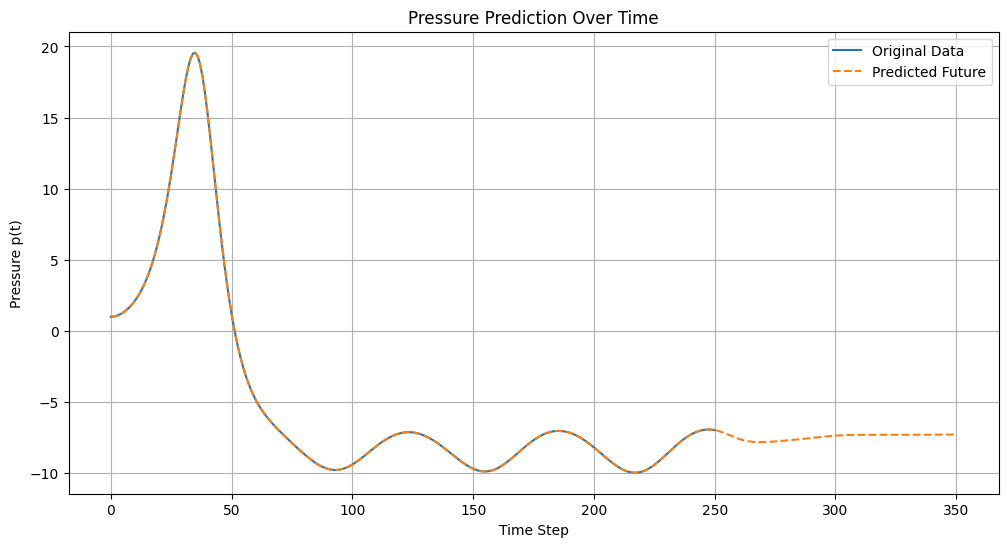

In [169]:
# 1[10pt]. Write a code to setup the system

# n = 9
X = []
y = []

for i in range(8, len(p)-1):
    X.append(list(p[i-8:i+1]) + [1])
    y.append(p[i+1])

X = np.array(X)
y = np.array(y)

# 2[10pt]. Solve for the coeficients $\alpha$

coeffs, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
print("Coefficients:", coeffs)

# 3[5pt]. Use the coeficients to predict the data for 100 times into the future.

p_extended = p.copy()

for _ in range(100):
    last_9 = p_extended[-9:]
    next_p = np.dot(last_9, coeffs[:-1]) + coeffs[-1]
    p_extended = np.append(p_extended, next_p)

# 4[3pt]. Plot the solution

plt.figure(figsize=(12,6))
plt.plot(range(len(p)), p, label="Original Data")
plt.plot(range(len(p_extended)), p_extended, label="Predicted Future", linestyle='--')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Pressure p(t)')
plt.title('Pressure Prediction Over Time')
plt.grid(True)
plt.show()

# 5[5pt]. Is the model we use is good to represent the data? Explain in up to 30 words.

# This model is good for local predictions as it fits short-term trends reasonably. However,
# it fails to properly capture oscillations as time step approaches 300.

**2.[33pts]Interpolation in 2D**

Bellow we observe the data X, Y, fobs.

1[8pts]. Use scatter to plot the data

2[17pts]. Interpolate the data to a mesh between  $[−3,3]^2$ using radial basis functions

3[9pts]. Do you consider the interpolation a good model for the data? Explain in up to 30 words

In [170]:
X = [-0.8371, -0.2983, -0.3657,  2.1198, -0.9171,  0.9076,  3.4172, -1.4506,
         0.5975,  1.3606, -1.5625,  0.2832, -0.6721, -0.6670, -1.4378, -2.8529,
         1.2108,  0.8693, -1.0267, -1.2489, -0.6649,  0.1529, -0.1435, -0.7126,
        -0.3448,  1.0169, -0.0618,  0.8597,  0.7657,  0.8588,  3.1337,  0.7469,
        -2.4368, -0.4496,  1.2282,  0.6283,  0.7740,  2.3444,  0.3370, -0.0980,
         1.3500,  0.3577, -2.0671, -0.2769, -1.1037,  4.2951,  0.3430, -1.6060,
         0.1909,  1.3097,  2.5035,  1.7909,  0.3201,  1.8895,  0.0610,  0.3466,
         0.1753, -0.0112, -0.5595, -0.5784,  0.6262,  1.2927,  0.0652, -0.3908,
         1.5388,  1.0924,  0.9248, -2.8502,  0.3871,  0.8016,  0.1263,  1.1289,
        -0.6715,  1.3713, -2.0838,  2.0467,  0.4173, -0.3967,  0.1098, -0.2198,
        -2.0632,  2.3545, -1.3492, -1.1168, -1.0750, -0.0067,  0.8466,  1.4259,
        -1.0833, -0.3688, -1.4103, -0.7679,  0.1310,  0.8443,  0.7564, -0.5241,
         2.1159, -0.6414,  0.2678,  0.9606, -1.1700, -0.7441,  0.9184,  2.4930,
        -1.5950,  1.0356, -0.6833, -0.2696, -0.9041, -0.1759, -0.2918, -0.0793,
         1.4149,  1.9853,  1.4564,  0.4546, -1.2795,  2.5944,  0.9553, -0.9872,
         0.9071,  1.1433,  0.9519,  2.9584,  0.2293,  0.3872, -1.8051,  3.0008,
         1.1796, -0.5691, -2.6615, -1.8550, -0.1776,  0.1824, -0.1347, -1.3498,
         0.4050,  0.4747, -0.2167, -0.3691, -0.8793,  2.5167, -0.9515,  2.9662,
         1.5449,  0.3986, -0.7686,  0.7374,  0.1030, -0.0999, -1.9129,  0.1226,
         0.8029,  0.2315, -1.7329, -1.3572, -1.2479,  0.7866, -1.3076, -0.0560,
        -2.3055, -0.4778,  0.0123, -0.4660,  1.1629, -1.3516, -2.1791, -0.6750,
         3.0423,  0.4922, -1.2862,  3.6153, -3.7062,  2.0820, -0.1300, -0.5799,
        -1.0246,  3.3800,  1.4247, -0.5862,  0.3784, -2.2270, -0.1018, -0.1221,
        -0.2336, -0.5818,  0.4474, -1.1310, -0.5016, -0.7322,  1.0255,  0.9595,
         3.5617, -0.9191, -1.1268, -1.0753, -0.8759,  1.1282, -0.5049, -1.6056,
         1.3936, -0.2991,  0.2627,  1.4491, -1.5569, -2.2165,  3.3850,  1.1584,
        -2.7090,  0.0238, -1.6534,  0.9744, -2.5527, -1.3057,  1.2429,  1.4522,
         0.4577,  0.1759,  0.2061,  0.0411,  1.0937,  0.2028, -0.9614, -0.9181,
        -1.5082,  0.0720, -1.4026,  1.0458,  0.4164,  0.3589,  1.3058,  2.7841,
        -1.6472, -0.0457,  2.1097,  2.8172,  0.7587, -0.7838, -2.5176,  0.1153,
        -3.2447,  0.0181, -0.3333, -0.5363, -0.2312,  0.4206,  2.3509, -0.5862,
        -1.0512,  0.7843]


Y = [ 1.8110e-01,  1.0897e+00, -2.5959e+00,  1.9987e+00,  1.6573e+00,
        -1.9487e-02,  1.6819e+00, -7.4790e-01,  1.2953e+00,  5.0217e-01,
         3.7336e-01, -7.8079e-01, -1.2454e+00, -1.6481e+00, -1.3952e-01,
         3.6339e-01,  1.0411e+00,  2.6008e+00, -1.7153e+00, -3.6031e+00,
        -5.4984e-01,  8.0479e-01,  3.9827e-01,  3.5389e+00,  1.6548e+00,
         1.9663e+00,  1.6888e+00, -2.3979e-03, -1.8328e-01,  1.2885e+00,
        -5.3586e-01, -1.1899e+00, -1.9786e+00, -5.6088e-01,  2.6326e-01,
         4.3238e-01, -2.0136e-01, -3.0004e+00, -4.7610e-01, -2.1693e+00,
         9.6149e-01,  1.3670e+00, -1.6832e+00,  7.3401e-01,  4.9161e-01,
        -2.9249e-01, -1.4189e+00,  1.1769e+00,  2.6880e+00,  2.7550e+00,
         1.3749e-01,  2.7599e+00,  3.4738e+00, -1.3248e+00,  5.1458e-01,
         1.3927e+00,  6.0821e-01, -6.1063e-01,  6.1463e-01, -1.6885e+00,
         2.4599e-01,  8.3464e-01, -1.7099e+00, -7.9952e-01,  1.5082e+00,
        -1.3088e-01, -2.5635e+00,  2.5277e+00,  1.3026e+00,  2.7799e+00,
         4.6544e-01, -1.9895e+00,  5.4702e-01,  1.0067e+00, -1.7165e+00,
         1.8043e+00, -1.5100e+00, -1.5597e+00,  1.3995e+00, -1.4821e+00,
        -1.4202e-01,  6.0635e-01,  9.6733e-02, -6.3189e-01, -4.3276e-02,
         3.7355e-01, -8.2696e-01,  1.6453e+00, -1.7775e+00,  1.7215e+00,
         1.0747e+00, -1.2841e-01,  2.8320e-01, -1.0519e+00,  1.0464e+00,
         7.4937e-01,  1.4735e+00, -8.8250e-01,  1.6724e+00,  1.7914e+00,
        -1.9641e+00, -1.1370e+00, -9.0009e-01, -6.5626e-01,  7.5928e-01,
        -1.3983e-01, -1.4453e+00, -1.7571e+00, -6.1295e-01, -1.8987e-01,
        -1.1296e-02,  1.8125e+00, -3.5882e+00, -1.3516e+00,  2.0095e-02,
         2.4221e+00, -4.6887e-01, -3.7325e-01,  1.4370e+00, -5.0748e-02,
        -1.3145e+00,  4.9843e-01, -7.5861e-01, -1.0582e+00, -1.6247e-01,
         2.1643e+00, -9.0649e-01,  1.5926e-01,  6.2938e-01, -1.1317e+00,
        -1.9331e+00,  8.1004e-01, -6.4850e-01, -6.8848e-01, -3.2667e-01,
        -1.0047e+00, -3.4226e-02,  1.0112e+00,  1.9888e+00,  8.1270e-01,
         2.5066e+00, -1.0124e+00,  1.0765e+00, -3.3089e+00, -7.4063e-01,
        -2.1637e-01,  1.2550e+00,  5.4818e-03,  2.4182e-01,  3.5573e+00,
         1.8495e+00,  3.3718e+00,  8.0715e-01,  3.8606e-01, -1.5569e-01,
         1.5772e-01, -6.2780e-01,  2.2446e-01,  1.7902e+00, -7.3451e-01,
         8.9517e-01, -5.3827e-01, -1.2466e+00, -5.2354e-01,  1.1160e+00,
         1.5752e+00, -2.7757e+00, -7.8219e-02, -2.5160e-02,  1.8288e+00,
         1.3152e-01, -2.3507e-01, -1.9856e-01,  4.2726e-01,  1.4702e+00,
        -8.3935e-02,  9.3019e-01,  1.6021e+00, -1.4581e+00,  1.3932e-01,
         6.9688e-01, -1.7021e+00, -3.3891e-01,  1.1013e+00,  9.1739e-01,
        -6.0935e-01, -1.3185e+00, -8.7266e-01, -2.5143e-01, -7.0249e-01,
         9.7084e-01, -1.6851e+00,  1.1494e+00, -8.2279e-01, -2.3640e+00,
        -2.3768e-01,  2.6339e+00, -1.6236e+00,  6.3872e-01, -8.6617e-01,
        -1.7278e-01,  2.5226e-01,  3.2907e-02, -8.2464e-01, -2.1380e-01,
        -3.8360e-02,  9.2635e-01,  1.8971e+00, -1.0203e+00, -1.0760e+00,
         2.3172e+00, -5.8648e-01, -2.0030e+00,  3.0154e+00,  1.5398e+00,
        -4.4757e-01,  8.9525e-01,  1.2996e+00,  2.0823e+00,  1.4457e+00,
        -1.1180e+00, -5.3365e-01,  5.4997e-02,  1.0858e+00, -2.6802e-01,
        -1.9557e+00,  2.7769e+00,  2.9649e-01, -1.8666e+00, -2.1156e+00,
         3.7596e-01,  7.4481e-01,  2.6167e+00, -3.6797e+00,  2.2031e+00,
        -1.7400e+00,  3.2041e-01,  4.0891e+00, -1.0157e+00, -4.4422e-01,
        -1.0264e+00, -3.8353e-01, -6.6231e-02, -2.7241e+00, -1.2608e+00,
         2.8361e+00,  2.2409e+00, -2.3466e+00,  8.9519e-01,  8.1950e-01]


fobs = [ 1.0143,  1.3637, -1.9099,  0.0254,  1.6916, -0.9271,  0.1542,  0.5727,
         0.6302, -0.7932,  1.8279, -1.0554, -0.5087, -0.7951,  1.2896,  2.6703,
        -0.1282,  0.5905, -0.3839,  0.5114,  0.1125,  0.6502,  0.5414,  0.9791,
         1.8929,  0.4318,  1.7474, -0.8621, -0.9458,  0.3472, -2.1725, -1.6917,
        -0.0945, -0.1101, -0.9482, -0.1936, -0.9714, -0.5185, -0.8096, -2.0558,
        -0.2882,  0.9695, -0.0366,  1.0040,  1.5181, -3.4726, -1.6932,  1.3979,
         2.3890, -0.1802, -2.3196, -0.1909,  2.5430, -0.7652,  0.4535,  1.0060,
         0.4321, -0.5994,  1.1511, -0.9419, -0.3787, -0.3742, -1.7714, -0.4021,
        -0.0097, -1.2191, -1.0254,  0.5944,  0.8772,  0.7026,  0.3390, -1.0838,
         1.1913, -0.2594, -0.0433,  0.0344, -1.8023, -1.0902,  1.2846, -1.2401,
         1.8938, -1.2120,  1.4419,  0.4457,  1.0313,  0.3803, -1.5402,  0.0668,
        -0.3381,  1.9527,  1.6371,  0.6384,  0.1522, -1.6565,  0.2607,  1.2410,
        -0.0049, -0.2284,  1.3581,  0.4773, -0.2582, -0.3477, -1.6184, -1.9208,
         1.8196, -1.1713, -0.6440, -1.4325,  0.2765, -0.0139,  0.2805,  1.8853,
         0.9206, -0.5502, -1.4361,  1.5934,  0.7628, -2.5251,  0.3441,  0.9361,
        -1.7313, -0.6105, -1.5657, -0.0141, -0.3917,  1.5763,  0.5480, -2.7346,
        -0.5010, -0.5245, -0.1285,  1.7695, -0.4698, -0.8686, -0.1919,  0.2487,
        -0.4392,  0.5161,  2.1379,  1.1642,  1.2385, -0.7748,  1.6915,  0.2431,
        -1.8185, -0.6142,  1.7241, -0.7319,  0.1388,  3.5807, -0.4105,  3.1575,
         0.0040,  0.1544,  1.5582,  1.5034,  0.5586, -0.5592,  0.9501, -0.6784,
         1.3661, -0.0598, -1.2588, -0.0570, -0.0347,  1.1660,  0.0229,  0.5965,
        -3.0644,  1.1632,  1.4109, -3.4033,  3.1996, -1.4450,  1.5905,  0.4958,
         1.6720,  0.2506, -1.2135,  0.7247,  0.3148, -0.0837, -0.2371,  1.2198,
         1.1422, -0.0270, -1.6653,  0.2184,  0.2495,  0.0284, -0.0461, -1.6339,
         0.4800,  0.0874, -0.2135,  0.8286,  1.1274, -1.4514,  1.1239,  0.5231,
        -1.5513,  0.5509, -0.2298, -1.7699,  1.3184,  2.1755, -0.0046,  0.2723,
         0.2252, -1.0997, -0.6595, -1.4773, -0.0990, -0.7838,  0.1461, -1.7688,
         0.4254,  1.1139,  1.8192,  1.4037, -1.7003, -0.7350,  1.0159,  1.6881,
         1.2067, -2.0210, -0.7340, -0.7373, -2.0600, -2.2435, -0.8929, -0.8617,
        -0.9103, -3.6168, -0.0200,  0.9130, -0.4340, -0.0963,  0.3241, -0.5593,
        -0.1249, -0.4016,  0.2670, -1.4886, -1.0151,  1.8819,  0.0177, -1.2554,
         1.6716,  0.0328]

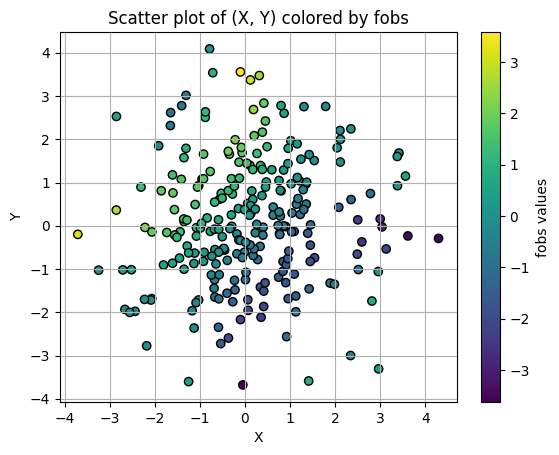

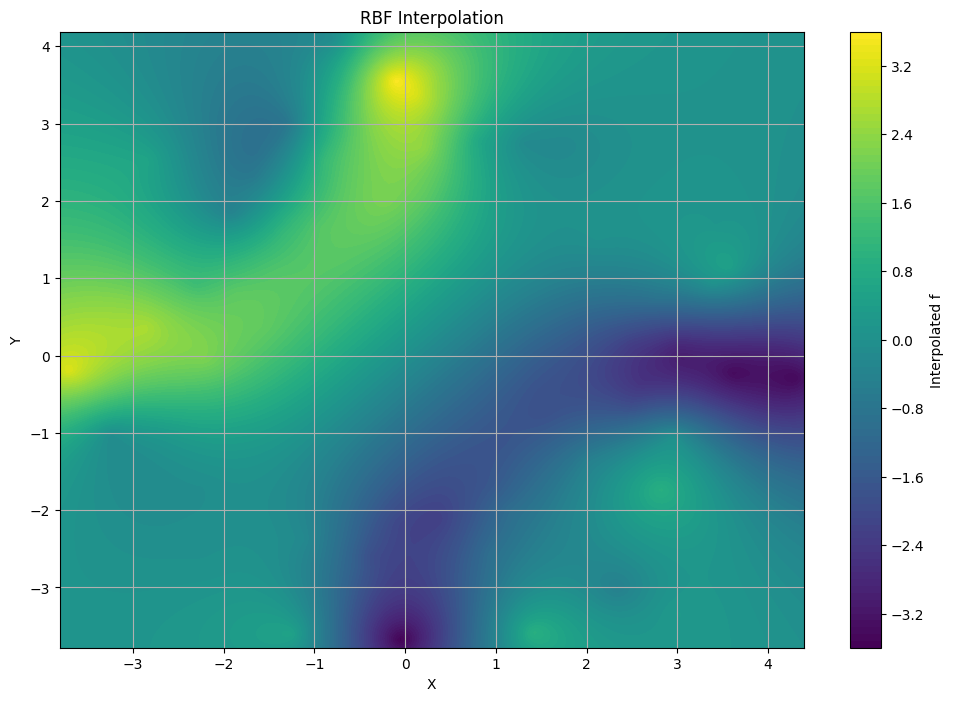

In [171]:
# 1[8pts]. Use scatter to plot the data

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

plt.figure()
plt.scatter(X, Y, c=fobs, cmap='viridis', edgecolors='k')
plt.colorbar(label='fobs values')
plt.title('Scatter plot of (X, Y) colored by fobs')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#2[17pts]. Interpolate the data to a mesh between  $[−3,3]^2$ using radial basis functions

def RBFinterp(Xobs, f, XI, eps=0.5, lam=1e-6):
    D = cdist(Xobs, Xobs)
    A = np.exp(-D * eps)
    c = np.linalg.solve(A + lam * np.eye(len(f)), f)
    DI = cdist(XI, Xobs)
    AI = np.exp(-DI * eps)
    return AI @ c

Xobs = np.stack((X, Y), axis=1)

padding = 0.1
x_min, x_max = min(X) - padding, max(X) + padding
y_min, y_max = min(Y) - padding, max(Y) + padding

grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
XI = np.column_stack((grid_x.ravel(), grid_y.ravel()))
ZI = RBFinterp(Xobs, fobs, XI).reshape(grid_x.shape)

plt.figure(figsize=(12, 8))
plt.contourf(grid_x, grid_y, ZI, levels=100, cmap='viridis')
#plt.scatter(X, Y, c=fobs, edgecolors='k', linewidths=1)
plt.colorbar(label='Interpolated f')
plt.title("RBF Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#3[9pts]. Do you consider the interpolation a good model for the data? Explain in up to 30 words

# Yes, RBF interpolation works well when capturing data that is dense and smoothly varying.
# However, it may overfit more sparse regions in data.


**3[33pts]. Classification**

The data below represents values X and Y and their class, c.

1[18pts]. Use scatter to plot the data.

2[20pts]. Using the data, X, Y, c find the class of the new points Xnew and Ynew given bellow

3[5pts]. Do you believe that you classify the points correctly? Explain in up tp 30 words.

In [172]:
X = [-0.8371, -0.2983, -0.3657,  2.1198, -0.9171,  0.9076,  3.4172, -1.4506,
         0.5975,  1.3606, -1.5625,  0.2832, -0.6721, -0.6670, -1.4378, -2.8529,
         1.2108,  0.8693, -1.0267, -1.2489, -0.6649,  0.1529, -0.1435, -0.7126,
        -0.3448,  1.0169, -0.0618,  0.8597,  0.7657,  0.8588,  3.1337,  0.7469,
        -2.4368, -0.4496,  1.2282,  0.6283,  0.7740,  2.3444,  0.3370, -0.0980,
         1.3500,  0.3577, -2.0671, -0.2769, -1.1037,  4.2951,  0.3430, -1.6060,
         0.1909,  1.3097,  2.5035,  1.7909,  0.3201,  1.8895,  0.0610,  0.3466,
         0.1753, -0.0112, -0.5595, -0.5784,  0.6262,  1.2927,  0.0652, -0.3908,
         1.5388,  1.0924,  0.9248, -2.8502,  0.3871,  0.8016,  0.1263,  1.1289,
        -0.6715,  1.3713, -2.0838,  2.0467,  0.4173, -0.3967,  0.1098, -0.2198,
        -2.0632,  2.3545, -1.3492, -1.1168, -1.0750, -0.0067,  0.8466,  1.4259,
        -1.0833, -0.3688, -1.4103, -0.7679,  0.1310,  0.8443,  0.7564, -0.5241,
         2.1159, -0.6414,  0.2678,  0.9606, -1.1700, -0.7441,  0.9184,  2.4930,
        -1.5950,  1.0356, -0.6833, -0.2696, -0.9041, -0.1759, -0.2918, -0.0793,
         1.4149,  1.9853,  1.4564,  0.4546, -1.2795,  2.5944,  0.9553, -0.9872,
         0.9071,  1.1433,  0.9519,  2.9584,  0.2293,  0.3872, -1.8051,  3.0008,
         1.1796, -0.5691, -2.6615, -1.8550, -0.1776,  0.1824, -0.1347, -1.3498,
         0.4050,  0.4747, -0.2167, -0.3691, -0.8793,  2.5167, -0.9515,  2.9662,
         1.5449,  0.3986, -0.7686,  0.7374,  0.1030, -0.0999, -1.9129,  0.1226,
         0.8029,  0.2315, -1.7329, -1.3572, -1.2479,  0.7866, -1.3076, -0.0560,
        -2.3055, -0.4778,  0.0123, -0.4660,  1.1629, -1.3516, -2.1791, -0.6750,
         3.0423,  0.4922, -1.2862,  3.6153, -3.7062,  2.0820, -0.1300, -0.5799,
        -1.0246,  3.3800,  1.4247, -0.5862,  0.3784, -2.2270, -0.1018, -0.1221,
        -0.2336, -0.5818,  0.4474, -1.1310, -0.5016, -0.7322,  1.0255,  0.9595,
         3.5617, -0.9191, -1.1268, -1.0753, -0.8759,  1.1282, -0.5049, -1.6056,
         1.3936, -0.2991,  0.2627,  1.4491, -1.5569, -2.2165,  3.3850,  1.1584,
        -2.7090,  0.0238, -1.6534,  0.9744, -2.5527, -1.3057,  1.2429,  1.4522,
         0.4577,  0.1759,  0.2061,  0.0411,  1.0937,  0.2028, -0.9614, -0.9181,
        -1.5082,  0.0720, -1.4026,  1.0458,  0.4164,  0.3589,  1.3058,  2.7841,
        -1.6472, -0.0457,  2.1097,  2.8172,  0.7587, -0.7838, -2.5176,  0.1153,
        -3.2447,  0.0181, -0.3333, -0.5363, -0.2312,  0.4206,  2.3509, -0.5862,
        -1.0512,  0.7843]


Y = [ 1.8110e-01,  1.0897e+00, -2.5959e+00,  1.9987e+00,  1.6573e+00,
        -1.9487e-02,  1.6819e+00, -7.4790e-01,  1.2953e+00,  5.0217e-01,
         3.7336e-01, -7.8079e-01, -1.2454e+00, -1.6481e+00, -1.3952e-01,
         3.6339e-01,  1.0411e+00,  2.6008e+00, -1.7153e+00, -3.6031e+00,
        -5.4984e-01,  8.0479e-01,  3.9827e-01,  3.5389e+00,  1.6548e+00,
         1.9663e+00,  1.6888e+00, -2.3979e-03, -1.8328e-01,  1.2885e+00,
        -5.3586e-01, -1.1899e+00, -1.9786e+00, -5.6088e-01,  2.6326e-01,
         4.3238e-01, -2.0136e-01, -3.0004e+00, -4.7610e-01, -2.1693e+00,
         9.6149e-01,  1.3670e+00, -1.6832e+00,  7.3401e-01,  4.9161e-01,
        -2.9249e-01, -1.4189e+00,  1.1769e+00,  2.6880e+00,  2.7550e+00,
         1.3749e-01,  2.7599e+00,  3.4738e+00, -1.3248e+00,  5.1458e-01,
         1.3927e+00,  6.0821e-01, -6.1063e-01,  6.1463e-01, -1.6885e+00,
         2.4599e-01,  8.3464e-01, -1.7099e+00, -7.9952e-01,  1.5082e+00,
        -1.3088e-01, -2.5635e+00,  2.5277e+00,  1.3026e+00,  2.7799e+00,
         4.6544e-01, -1.9895e+00,  5.4702e-01,  1.0067e+00, -1.7165e+00,
         1.8043e+00, -1.5100e+00, -1.5597e+00,  1.3995e+00, -1.4821e+00,
        -1.4202e-01,  6.0635e-01,  9.6733e-02, -6.3189e-01, -4.3276e-02,
         3.7355e-01, -8.2696e-01,  1.6453e+00, -1.7775e+00,  1.7215e+00,
         1.0747e+00, -1.2841e-01,  2.8320e-01, -1.0519e+00,  1.0464e+00,
         7.4937e-01,  1.4735e+00, -8.8250e-01,  1.6724e+00,  1.7914e+00,
        -1.9641e+00, -1.1370e+00, -9.0009e-01, -6.5626e-01,  7.5928e-01,
        -1.3983e-01, -1.4453e+00, -1.7571e+00, -6.1295e-01, -1.8987e-01,
        -1.1296e-02,  1.8125e+00, -3.5882e+00, -1.3516e+00,  2.0095e-02,
         2.4221e+00, -4.6887e-01, -3.7325e-01,  1.4370e+00, -5.0748e-02,
        -1.3145e+00,  4.9843e-01, -7.5861e-01, -1.0582e+00, -1.6247e-01,
         2.1643e+00, -9.0649e-01,  1.5926e-01,  6.2938e-01, -1.1317e+00,
        -1.9331e+00,  8.1004e-01, -6.4850e-01, -6.8848e-01, -3.2667e-01,
        -1.0047e+00, -3.4226e-02,  1.0112e+00,  1.9888e+00,  8.1270e-01,
         2.5066e+00, -1.0124e+00,  1.0765e+00, -3.3089e+00, -7.4063e-01,
        -2.1637e-01,  1.2550e+00,  5.4818e-03,  2.4182e-01,  3.5573e+00,
         1.8495e+00,  3.3718e+00,  8.0715e-01,  3.8606e-01, -1.5569e-01,
         1.5772e-01, -6.2780e-01,  2.2446e-01,  1.7902e+00, -7.3451e-01,
         8.9517e-01, -5.3827e-01, -1.2466e+00, -5.2354e-01,  1.1160e+00,
         1.5752e+00, -2.7757e+00, -7.8219e-02, -2.5160e-02,  1.8288e+00,
         1.3152e-01, -2.3507e-01, -1.9856e-01,  4.2726e-01,  1.4702e+00,
        -8.3935e-02,  9.3019e-01,  1.6021e+00, -1.4581e+00,  1.3932e-01,
         6.9688e-01, -1.7021e+00, -3.3891e-01,  1.1013e+00,  9.1739e-01,
        -6.0935e-01, -1.3185e+00, -8.7266e-01, -2.5143e-01, -7.0249e-01,
         9.7084e-01, -1.6851e+00,  1.1494e+00, -8.2279e-01, -2.3640e+00,
        -2.3768e-01,  2.6339e+00, -1.6236e+00,  6.3872e-01, -8.6617e-01,
        -1.7278e-01,  2.5226e-01,  3.2907e-02, -8.2464e-01, -2.1380e-01,
        -3.8360e-02,  9.2635e-01,  1.8971e+00, -1.0203e+00, -1.0760e+00,
         2.3172e+00, -5.8648e-01, -2.0030e+00,  3.0154e+00,  1.5398e+00,
        -4.4757e-01,  8.9525e-01,  1.2996e+00,  2.0823e+00,  1.4457e+00,
        -1.1180e+00, -5.3365e-01,  5.4997e-02,  1.0858e+00, -2.6802e-01,
        -1.9557e+00,  2.7769e+00,  2.9649e-01, -1.8666e+00, -2.1156e+00,
         3.7596e-01,  7.4481e-01,  2.6167e+00, -3.6797e+00,  2.2031e+00,
        -1.7400e+00,  3.2041e-01,  4.0891e+00, -1.0157e+00, -4.4422e-01,
        -1.0264e+00, -3.8353e-01, -6.6231e-02, -2.7241e+00, -1.2608e+00,
         2.8361e+00,  2.2409e+00, -2.3466e+00,  8.9519e-01,  8.1950e-01]

c = [ 1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
        -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
         1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
         1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
        -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
        -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
         1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
         1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
        -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
        -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,
        -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.]

Xnew = [-3, -2, -1, 0, 1, 2, 3]
Ynew = [-1, -2, -1, 0, -2, 2, 1]


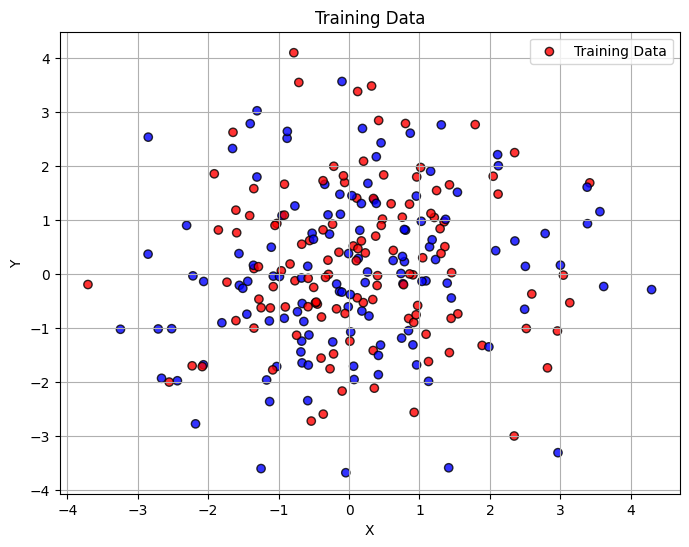

Predicted classes for new points:
Point (-3, -1) -> Class -1
Point (-2, -2) -> Class -1
Point (-1, -1) -> Class -1
Point (0, 0) -> Class -1
Point (1, -2) -> Class -1
Point (2, 2) -> Class -1
Point (3, 1) -> Class -1
Best eps: 0.1668, Best lam: 0.1000, Best validation acc: 0.5280


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.model_selection import KFold

# 1[18pts]. Use scatter to plot the data.

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=c, cmap='bwr', edgecolors='k', label='Training Data', alpha=0.8)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# 2[20pts]. Using the data, X, Y, c find the class of the new points Xnew and Ynew given bellow

def RBFinterp(Xobs, f, XI, eps=0.01, lam=0.1):
    D = cdist(Xobs, Xobs)
    A = np.exp(-D * eps)
    c = np.linalg.solve(A + lam * np.eye(len(f)), f)
    DI = cdist(XI, Xobs)
    AI = np.exp(-DI * eps)
    return AI @ c

c = np.array(c)
X = np.array(X)
Y = np.array(Y)
Xnew = np.array(Xnew)
Ynew = np.array(Ynew)

Xobs = np.column_stack((X, Y))
XI = np.column_stack((Xnew, Ynew))

candidate_eps = np.logspace(-1, 1, 10)  # from 0.1 to 10
candidate_lam = np.logspace(-4, -1, 10) # from 0.0001 to 0.1

results = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for eps in candidate_eps:
    for lam in candidate_lam:
        val_scores = []
        for train_index, val_index in kfold.split(Xobs):
            X_tr, X_val = Xobs[train_index], Xobs[val_index]
            Y_tr, Y_val = c[train_index], c[val_index]

            Y_val_predict = RBFinterp(X_tr, Y_tr, X_val, eps=eps, lam=lam)
            Y_val_predict = np.sign(Y_val_predict)

            acc = np.mean(Y_val_predict == Y_val)
            val_scores.append(acc)

        mean_val_acc = np.mean(val_scores)
        results.append((eps, lam, mean_val_acc))

eps_best, lam_best, best_acc = max(results, key=lambda x: x[2])
c_predicted = np.sign(RBFinterp(Xobs, c, XI, eps=eps_best, lam=lam_best))

print("Predicted classes for new points:")
for i in range(len(Xnew)):
    print(f"Point ({Xnew[i]}, {Ynew[i]}) -> Class {int(c_predicted[i])}")

# visual observation
#plt.scatter(X, Y, c=c, cmap='bwr', alpha=0.3, edgecolors='k', label='Training Data')
#for class_value in np.unique(c_predicted):
#    plt.scatter(
#        Xnew[c_predicted == class_value],
#        Ynew[c_predicted == class_value],
#        label=f'Predicted Class {int(class_value)}',
#        marker='X',
#        s=100,
#        edgecolors='k'
#    )
#plt.title('New Points Classification Overlaid on Training Data')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.grid(True)
#plt.legend()
#plt.show()

print(f"Best eps: {eps_best:.4f}, Best lam: {lam_best:.4f}, Best validation acc: {best_acc:.4f}")

# 3[5pts]. Do you believe that you classify the points correctly? Explain in up tp 30 words.

# Although optimizing RBF parameters, the data is too noisy for smooth interpolation.
# The low validation accuracy (52.8%) suggests that the model cannot reliablt
# classify the points.